In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image

In [59]:
im = np.asarray(Image.open('elephant.png').resize([227,227]))
im2 = np.expand_dims(im,axis=0)
x=tf.convert_to_tensor(im2,dtype=tf.float32)

model = np.load('vgg16_weights.npz',encoding='bytes')
W = model['conv1_1_W']
W1 = np.transpose(W,axes=[0,1,3,2])

In [60]:
y =tf.nn.conv2d_transpose(x,W1,output_shape=[1,226*2+1,226*2+1,64],strides=[1,2,2,1],padding='SAME')

In [61]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    y_out = y.eval(session=sess)
    print(y_out)

[[[[  18.00201      28.426071     75.682556   ...  -11.435715
     112.055305    169.82481   ]
   [ -40.212677     30.573664     44.97902    ...  -95.54251
      41.46982      53.875427  ]
   [  18.233881     28.024977     76.576744   ...  -11.485489
     113.37203     171.91512   ]
   ...
   [  16.136642     27.472612     68.076675   ...  -10.491776
     100.78167     152.49388   ]
   [ -32.968735     31.273277     42.449867   ...  -87.17582
      41.4787       52.090797  ]
   [  16.784218     27.925297     70.71625    ...  -10.841095
     104.71098     158.51865   ]]

  [[  51.004753     41.555862     13.620159   ...  -99.84944
       0.2647934     4.0759277 ]
   [ -23.11932      48.161873    -64.99649    ... -220.00877
    -152.15445    -224.86351   ]
   [  47.92726      40.631752     13.63711    ...  -99.80112
       2.6954346     4.768322  ]
   ...
   [  44.845963     40.704433     12.242135   ...  -89.749466
       0.92035675    3.4813957 ]
   [ -20.646723     49.882923    -57.66

In [62]:
y_out.shape

(1, 453, 453, 64)

In [63]:
y2 = np.squeeze(y_out,axis=0)

In [64]:
import matplotlib.pyplot as plt

In [66]:
y3 = (y2-y2.min())/(y2.max()-y2.min())

In [67]:
y3.shape

(453, 453, 64)

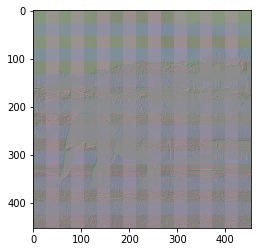

In [73]:
plt.imshow(y3[:,:,:3])